### Generate observations:

In [1]:
theta_0 = [4 2 1];
theta_0 = theta_0/norm(theta_0);

n = 100;
X = mvnrnd(theta_0, 10*eye(3), n);

In [2]:
N_samples = 10^4;

%mu = [1 1 1];
%psi = 1;
mu = theta_0;
psi = 10;

In [3]:
mu = mu/norm(mu);

% Posterior sampling using von Mises-Fisher prior:
psi_post = norm(sum(X,1) + psi*mu);
mu_post = (sum(X,1) + psi*mu)/psi_post;
post_samples_vmf = randVMF(N_samples, mu_post, psi_post);

%  Posterior sampling using projection:
post_samples_unconstr = mvnrnd(mu_post, eye(3)/psi_post, N_samples);
post_samples_proj = zeros(N_samples,3);
for i = 1:N_samples
    post_samples_proj(i,:) = post_samples_unconstr(i,:)/norm(post_samples_unconstr(i,:));
end

disp([norm(mean(post_samples_proj,1)-theta_0) norm(mean(post_samples_vmf,1)-theta_0)])

    0.4050    0.4034



In [4]:
disp([norm(post_samples_vmf-theta_0) norm(post_samples_proj-theta_0)])

   41.1689   41.3483



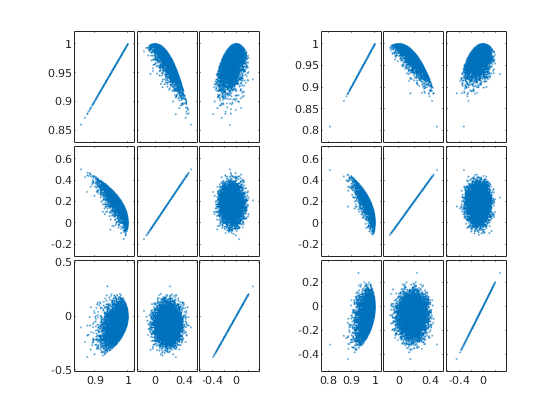

In [5]:
subplot(121)
plotmatrix(post_samples_vmf,post_samples_vmf)
subplot(122)
plotmatrix(post_samples_proj,post_samples_proj)

In [6]:
disp([mean(post_samples_vmf,1) mean(post_samples_proj,1)])

    0.9730    0.1816   -0.0780    0.9728    0.1807   -0.0796



In [23]:
disp(cov(post_samples_vmf)./cov(post_samples_proj))

    0.9434    0.9578    0.9103
    0.9578    0.9593   -0.3231
    0.9103   -0.3231    0.9788



In [26]:
norm(cov(post_samples_vmf)-cov(post_samples_proj))


ans =

   3.1488e-04

